In [1]:
# Importing our libraries
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

## Importing our dataset

In [2]:
# Import customer's table
customer_df = pd.read_csv(r"C:\Users\USER\Desktop\AltSchool Africa\Datasets\website optimization\customers.csv")

In [3]:
customer_df.head()

,customer_id,device_id,location,currency
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD
1,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN
3,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,Djibouti,NGN
4,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,1e939baf-c71d-444d-a832-d7dc3a6fcd0d,Guinea-Bissau,GBP


In [4]:
# Import event's table
event_df = pd.read_csv(r"C:\Users\USER\Desktop\AltSchool Africa\Datasets\website optimization\events.csv")

In [5]:
event_df.head()

,event_id,customer_id,event_data,event_timestamp
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398


In [6]:
# Import line item's table
line_item_df = pd.read_csv(r"C:\Users\USER\Desktop\AltSchool Africa\Datasets\website optimization\line_items.csv")

In [7]:
line_item_df.head()

,line_item_id,order_id,item_id,quantity
0,3201,9e950ce3-2e12-479c-a051-493c1a497d49,4,2
1,3202,9e950ce3-2e12-479c-a051-493c1a497d49,5,4
2,3203,9e950ce3-2e12-479c-a051-493c1a497d49,9,5
3,3204,9e950ce3-2e12-479c-a051-493c1a497d49,12,1
4,3205,9e950ce3-2e12-479c-a051-493c1a497d49,6,2


In [8]:
# Import order's table
order_df = pd.read_csv(r"C:\Users\USER\Desktop\AltSchool Africa\Datasets\website optimization\orders.csv")

In [9]:
order_df.head()

,order_id,customer_id,status,checked_out_at
0,5e57de16-d33c-4126-bf0b-da65449cc3d1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,cancelled,2024-03-30 04:12:10.394413
1,62a67177-1d7f-44fe-86f8-622686d68f69,5cc88463-6a08-48b5-977c-9683a1c607b2,cancelled,2024-03-30 04:15:10.403885
2,9e950ce3-2e12-479c-a051-493c1a497d49,cda7bec0-7cbf-4145-baf9-e049bab94504,success,2024-03-30 04:19:10.406794
3,cddddfea-27ef-437f-817d-8f849d604c3c,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,failed,2024-03-30 04:09:10.411149
4,170a66c8-6b39-468c-935c-445eb6be9fdf,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,cancelled,2024-03-30 04:09:10.412870


In [10]:
# Import product's table
product_df = pd.read_csv(r"C:\Users\USER\Desktop\AltSchool Africa\Datasets\website optimization\products.csv")

In [11]:
product_df

,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99
5,6,Adidas Ultraboost,180.00
6,7,Apple AirPods Pro,249.99
7,8,Sony WH-1000XM4 Headphones,349.99
8,9,Nintendo Switch,299.99
9,10,Dell XPS 13 Laptop,1299.99


In [12]:
# Merge customer's dataframe and event's dataframe based on their common primary key "customer_id"
m1 = customer_df.merge(event_df, how = "outer", on = "customer_id")

In [13]:
# Rename column "id" in the product's dataframe as "item id" so that it can match with "item id" in line item's dataframe
product_df.rename(columns= {"id": "item_id"}, inplace=True)

In [14]:
# Merge product's dataframe and line item's dataframe based on their common primary key "item_id"
m2 = product_df.merge(line_item_df,how = "outer", on = "item_id")

In [15]:
# Merge "m1" and order's dataframe based on their common primary key "customer_id"
m3 = m1.merge(order_df, how = "outer", on = "customer_id")

In [16]:
# Merge the merged dataframe "m3" and "m2" based on their common primary key "order_id"
m4 = m3.merge(m2, how = "outer", on = "order_id")

In [17]:
final_df = m4 # Output of our merged dataset

In [18]:
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,item_id,name,price,line_item_id,quantity
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14753,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN
1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14754,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN
2,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14755,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN
3,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14756,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN
4,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD,14757,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398,5e57de16-d33c-4126-bf0b-da65449cc3d1,cancelled,2024-03-30 04:12:10.394413,NaN,NaN,NaN,NaN,NaN


In [19]:
# Dimension of our dataset
final_df.shape

(652958, 15)

## Data Cleaning

In [20]:
# Checking our data for missing values
final_df.isna().sum()

customer_id            0
device_id              0
location               0
currency               0
event_id               0
event_data             0
event_timestamp        0
order_id            7073
status              7073
checked_out_at      7073
item_id            74638
name               74638
price              74638
line_item_id       74638
quantity           74638
dtype: int64

In [21]:
# Checking our data for percentage of missing values
row, column = final_df.shape
missing_percentage = final_df.isna().sum()/ row * 100
missing_percentage

customer_id         0.000000
device_id           0.000000
location            0.000000
currency            0.000000
event_id            0.000000
event_data          0.000000
event_timestamp     0.000000
order_id            1.083224
status              1.083224
checked_out_at      1.083224
item_id            11.430751
name               11.430751
price              11.430751
line_item_id       11.430751
quantity           11.430751
dtype: float64

Given that the missing values do not form a major part of our data and are from columns such as "order_id," "status," "checked_out_at," "item_id," "name," "price," "line_item_id," and "quantity," all of which are interrelated, we have concluded that attempting to fill in these missing values through extrapolation or other methods would be inappropriate as intentionally duplicating or fabricating IDs goes against the integrity of the dataset and the underlying data structure.

This is why we've chosen to remove rows containing missing values as a step to maintain the dataset's quality and ensure the accuracy of future analyses.¶

In [22]:
# Dropping rows with missing values
final_df.dropna(inplace= True)
final_df.reset_index(drop=True, inplace=True)
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,item_id,name,price,line_item_id,quantity
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4.0,Microsoft Xbox Series X,499.99,3201.0,2.0
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,5.0,Nike Air Max 270,129.99,3202.0,4.0
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,6.0,Adidas Ultraboost,180.00,3205.0,2.0
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,9.0,Nintendo Switch,299.99,3203.0,5.0
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,11.0,Canon EOS R5 Camera,3999.99,3206.0,4.0


In [23]:
# Getting information about our data with regards to total number of observations in each column and data type
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   device_id        578320 non-null  object 
 2   location         578320 non-null  object 
 3   currency         578320 non-null  object 
 4   event_id         578320 non-null  int64  
 5   event_data       578320 non-null  object 
 6   event_timestamp  578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  item_id          578320 non-null  float64
 11  name             578320 non-null  object 
 12  price            578320 non-null  float64
 13  line_item_id     578320 non-null  float64
 14  quantity         578320 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 66.2+ MB


In [24]:
# Casting our columns to their appropriate data types
final_df = final_df.astype({'event_id': 'object', 'item_id': 'object', 'line_item_id': 'object', 'quantity': 'int64', 'event_timestamp': 'datetime64[ns]', 'checked_out_at': 'datetime64[ns]'})
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      578320 non-null  object        
 1   device_id        578320 non-null  object        
 2   location         578320 non-null  object        
 3   currency         578320 non-null  object        
 4   event_id         578320 non-null  object        
 5   event_data       578320 non-null  object        
 6   event_timestamp  578320 non-null  datetime64[ns]
 7   order_id         578320 non-null  object        
 8   status           578320 non-null  object        
 9   checked_out_at   578320 non-null  datetime64[ns]
 10  item_id          578320 non-null  object        
 11  name             578320 non-null  object        
 12  price            578320 non-null  float64       
 13  line_item_id     578320 non-null  object        
 14  quantity         578

In [25]:
# Getting our column names
final_df.columns

Index(['customer_id', 'device_id', 'location', 'currency', 'event_id',
       'event_data', 'event_timestamp', 'order_id', 'status', 'checked_out_at',
       'item_id', 'name', 'price', 'line_item_id', 'quantity'],
      dtype='object')

In [26]:
# Rename "name" to "product_name" for more informative description
final_df.rename({"name": "product_name"}, axis = 1, inplace= True)

In [27]:
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,item_id,product_name,price,line_item_id,quantity
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4.0,Microsoft Xbox Series X,499.99,3201.0,2
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,5.0,Nike Air Max 270,129.99,3202.0,4
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,6.0,Adidas Ultraboost,180.00,3205.0,2
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,9.0,Nintendo Switch,299.99,3203.0,5
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,11.0,Canon EOS R5 Camera,3999.99,3206.0,4


### Feature Engineering and Temporal Analysis

In [28]:
# Subsetting a row from the "event data" column
final_df["event_data"].loc[0]

'{"timestamp": "2024-03-26T22:05:58.863661", "event_type": "visit"}'

In [29]:
# Extracting event type from event data column 
final_df['event_type'] = final_df['event_data'].apply(lambda x: json.loads(x)['event_type'])
final_df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,item_id,product_name,price,line_item_id,quantity,event_type
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,4.0,Microsoft Xbox Series X,499.99,3201.0,2,visit
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,5.0,Nike Air Max 270,129.99,3202.0,4,visit
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,6.0,Adidas Ultraboost,180.00,3205.0,2,visit
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,9.0,Nintendo Switch,299.99,3203.0,5,visit
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,11.0,Canon EOS R5 Camera,3999.99,3206.0,4,visit


In [30]:
# Drop redundant columns
# These columns sort of represent similar things and we also have columns that can be used to retrieve information they will give
final_df1 = final_df.drop(columns=["device_id", "event_id", "event_data", "order_id", "item_id", "line_item_id"])
final_df1.head()

,customer_id,location,currency,event_timestamp,status,checked_out_at,product_name,price,quantity,event_type
0,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,2024-03-26 22:05:58.863661,success,2024-03-30 04:19:10.406794,Microsoft Xbox Series X,499.99,2,visit
1,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,2024-03-26 22:05:58.863661,success,2024-03-30 04:19:10.406794,Nike Air Max 270,129.99,4,visit
2,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,2024-03-26 22:05:58.863661,success,2024-03-30 04:19:10.406794,Adidas Ultraboost,180.00,2,visit
3,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,2024-03-26 22:05:58.863661,success,2024-03-30 04:19:10.406794,Nintendo Switch,299.99,5,visit
4,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,2024-03-26 22:05:58.863661,success,2024-03-30 04:19:10.406794,Canon EOS R5 Camera,3999.99,4,visit


In [31]:
# Function to extract day of week and hour of the day
def extract_date_time(dataset, date):
    date_extract = pd.to_datetime(dataset[date], format="%Y-%m-%d %I:%M:%S")
   
    dataset["Day"] = date_extract.dt.day_name()
    dataset["Hour"] = date_extract.dt.hour
    return dataset["Day"], dataset["Hour"]

NOTE: We did not extract month and year because this dataset spans only March of 2024

In [32]:
# Loading our extract function 
extract_date_time(final_df1, "event_timestamp")

(0          Tuesday
 1          Tuesday
 2          Tuesday
 3          Tuesday
 4          Tuesday
             ...   
 578315    Saturday
 578316    Saturday
 578317    Saturday
 578318    Saturday
 578319    Saturday
 Name: Day, Length: 578320, dtype: object,
 0         22
 1         22
 2         22
 3         22
 4         22
           ..
 578315     4
 578316     4
 578317     4
 578318     4
 578319     4
 Name: Hour, Length: 578320, dtype: int32)

In [33]:
final_df1.head()

,customer_id,location,currency,event_timestamp,status,checked_out_at,product_name,price,quantity,event_type,Day,Hour
0,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,2024-03-26 22:05:58.863661,success,2024-03-30 04:19:10.406794,Microsoft Xbox Series X,499.99,2,visit,Tuesday,22
1,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,2024-03-26 22:05:58.863661,success,2024-03-30 04:19:10.406794,Nike Air Max 270,129.99,4,visit,Tuesday,22
2,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,2024-03-26 22:05:58.863661,success,2024-03-30 04:19:10.406794,Adidas Ultraboost,180.00,2,visit,Tuesday,22
3,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,2024-03-26 22:05:58.863661,success,2024-03-30 04:19:10.406794,Nintendo Switch,299.99,5,visit,Tuesday,22
4,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,2024-03-26 22:05:58.863661,success,2024-03-30 04:19:10.406794,Canon EOS R5 Camera,3999.99,4,visit,Tuesday,22


### Feature Understanding and Relationship

Understanding the relationships, trends and patterns in our dataset help us to improve product recommendations by highlighting popular products and  also create targeted promotion

In [34]:
# Number of unique customers that visited the website for the time period (March 2024)
unique_customers = final_df1["customer_id"].nunique()
unique_customers

4594

The number of unique customers that visited the website for this time period (March, 2024) are 4594 

In [35]:
# Disrtibution of how products were purchased according to their frequency
final_df1.groupby("product_name").size().sort_values(ascending = False)

product_name
Canon EOS R5 Camera            39715
Fitbit Charge 4                39268
Sony WH-1000XM4 Headphones     39162
Dell XPS 13 Laptop             39084
Samsung Galaxy S21             38997
iPhone 13                      38866
Microsoft Xbox Series X        38842
Adidas Ultraboost              38835
Nike Air Max 270               38782
Coca-Cola 12-Pack              38440
Apple AirPods Pro              38291
Samsung 55-Inch 4K Smart TV    38043
Starbucks Coffee Beans         37515
Sony PlayStation 5             37501
Nintendo Switch                36979
dtype: int64

This shows that "Canon E0S R5 Camera" was the most purchased product and "Nintendo Switch" was the least purchased product

In [36]:
# Understanding activities that took place on the website based on "event type"
final_df1.groupby("event_type").size().sort_values(ascending = False)

event_type
add_to_cart         269335
visit               143154
remove_from_cart    134090
checkout             31741
dtype: int64

This shows that products was added to cart 269,335 times, visits only was 143154 times, number of times products was removed from cart is 134,090 and number of times checkout was done is 31,741.

In [37]:
# Checking the "status" for website activities
final_df1.groupby("status").size().sort_values(ascending = False)

status
failed       196383
success      192594
cancelled    189343
dtype: int64

This implies that 192,594 website activities were successful, 189,343 activities were cancelled and 196,383 activities failed

In [38]:
# Event type that were successful 
success_events = final_df1[final_df1['status'] == 'success'].groupby('event_type').size().sort_values(ascending = False)
print(success_events)


event_type
add_to_cart         90055
visit               47714
remove_from_cart    44152
checkout            10673
dtype: int64


This shows that 90,055 products were successfully added to cart, 47,714 visits were successful, 44,152 products were successfully removed from cart is and 10,673 checkout were successful

In [39]:
# Activities on the website based on location
final_df1.groupby("location").size().sort_values(ascending = False)

location
Korea        6997
Argentina    4507
Mauritius    4414
Jersey       4130
Panama       3936
             ... 
Chad         1082
Malaysia     1037
Austria       921
Italy         783
Uruguay       734
Length: 243, dtype: int64

This shows that most activities on the website came from Korea and least activities were done from Uruguay

In [40]:
# Activities on the website based on day of the week
final_df1.groupby("Day")["event_type"].size().sort_values(ascending = False)

Day
Saturday     534760
Wednesday     10098
Thursday       9585
Tuesday        8388
Friday         5689
Monday         5021
Sunday         4779
Name: event_type, dtype: int64

This shows that majority of activities on the website were done on Saturday and lowest number of activities were done on Sunday

In [41]:
# Number of cutomers whose activities on the website were successful
completed_orders = final_df1[final_df1['status'] == 'success']['customer_id'].nunique()
completed_orders

1548

this reveals that of the 4594 customers that visited the website, only 1548 of them were able to execute their activities successfully

In [42]:
# Distribution of products according to how they were checked out (purchase made)
final_df1[final_df1['event_type'] == 'checkout']['product_name'].value_counts()

product_name
Canon EOS R5 Camera            2174
Fitbit Charge 4                2172
Sony WH-1000XM4 Headphones     2150
iPhone 13                      2142
Adidas Ultraboost              2138
Microsoft Xbox Series X        2134
Dell XPS 13 Laptop             2134
Nike Air Max 270               2126
Samsung Galaxy S21             2123
Apple AirPods Pro              2116
Coca-Cola 12-Pack              2113
Samsung 55-Inch 4K Smart TV    2081
Sony PlayStation 5             2064
Starbucks Coffee Beans         2053
Nintendo Switch                2021
Name: count, dtype: int64

This shows that "Canon E0S R5 Camera" was the most checked out product and "Nintendo Switch" was the least checked out product

In [43]:
# Event activities distribution according to location 
final_df1.groupby(["location","event_type"]).size().sort_values(ascending= False)

location   event_type 
Korea      add_to_cart    3179
Argentina  add_to_cart    2096
Mauritius  add_to_cart    2086
Jersey     add_to_cart    2019
Albania    add_to_cart    1929
                          ... 
Taiwan     checkout         66
Honduras   checkout         65
Italy      checkout         62
Austria    checkout         55
Uruguay    checkout         48
Length: 972, dtype: int64

In [44]:
# Function to show how event type vary by location, day of week and type/name of product

def event_type_by_location(df, eventtype):
    filtered_df = df[df["event_type"] == eventtype]
    event_by_location = filtered_df.groupby(["event_type", "location"]).size().sort_values(ascending= False)
    return event_by_location

def event_type_by_day(df, eventtype):
    filtered_df = df[df["event_type"] == eventtype]
    event_by_day = filtered_df.groupby(["event_type", "Day"]).size().sort_values(ascending= False)
    return event_by_day

def event_type_by_product(df, eventtype):
    filtered_df = df[df["event_type"] == eventtype]
    event_by_product = filtered_df.groupby(["event_type", "product_name"]).size().sort_values(ascending= False)
    return event_by_product

In [45]:
#  Location of website activities based on event type (add to cart), function can be adjusted based on the event you want to view
event_type_by_location(final_df1, "add_to_cart")

event_type   location 
add_to_cart  Korea        3179
             Argentina    2096
             Mauritius    2086
             Jersey       2019
             Albania      1929
                          ... 
             Taiwan        520
             Malaysia      431
             Austria       359
             Italy         336
             Uruguay       324
Length: 243, dtype: int64

In [46]:
# Purchasing behavior based on location
print("\nPurchasing behavior by location:")

event_type_by_location(final_df1, "checkout")


Purchasing behavior by location:


event_type  location 
checkout    Korea        347
            Argentina    236
            Mauritius    236
            Jersey       223
            Albania      215
                        ... 
            Taiwan        66
            Honduras      65
            Italy         62
            Austria       55
            Uruguay       48
Length: 243, dtype: int64

In [47]:
# Product distribution based on event type (checkout),function can be adjusted based on the event you want to view
event_type_by_product(final_df1, "checkout")

event_type  product_name               
checkout    Canon EOS R5 Camera            2174
            Fitbit Charge 4                2172
            Sony WH-1000XM4 Headphones     2150
            iPhone 13                      2142
            Adidas Ultraboost              2138
            Dell XPS 13 Laptop             2134
            Microsoft Xbox Series X        2134
            Nike Air Max 270               2126
            Samsung Galaxy S21             2123
            Apple AirPods Pro              2116
            Coca-Cola 12-Pack              2113
            Samsung 55-Inch 4K Smart TV    2081
            Sony PlayStation 5             2064
            Starbucks Coffee Beans         2053
            Nintendo Switch                2021
dtype: int64

In [48]:
# Event type (add to cart) distribution according to day of the week,function can be adjusted based on the event you want to view
event_type_by_day(final_df1, "add_to_cart")

event_type   Day     
add_to_cart  Saturday    269335
dtype: int64

This reveals that product were added to cart only on Saturday

In [49]:
# Event type (visit) distribution according to day of the week,function can be adjusted based on the event you want to view
event_type_by_day(final_df1, "visit")

event_type  Day      
visit       Saturday     99594
            Wednesday    10098
            Thursday      9585
            Tuesday       8388
            Friday        5689
            Monday        5021
            Sunday        4779
dtype: int64

This reveals that more people visited the website on Saturday while Sunday has the least visits

In [50]:
# Conversion Rate from event to order
total_events = len(final_df1)
total_orders = final_df1[final_df1['event_type'] == 'checkout']['customer_id'].nunique()
conversion_rate = (total_orders / total_events) * 100
conversion_rate

0.7943698990178448

This shows that there is a 0.79% conversion rate on this website. It implies that out of every 100 events that occurred, approximately 0.79 of them resulted in a successful conversion.

In [51]:
# Frequency of customers that just visited the company's website
visit_frequency = final_df1[final_df1['event_type'] == 'visit'].groupby('customer_id')['event_type'].count()
average_visit_frequency = visit_frequency.mean()

print("Average visit frequency:", average_visit_frequency)

Average visit frequency: 31.161079669133652


This shows that the frequency with which customers just visited the website is about 32%

In [52]:
# Time taken for checkout after adding items to cart
time_diff = final_df1['checked_out_at'] - final_df1['event_timestamp']
average_checkout_time = time_diff.mean()
average_checkout_time

Timedelta('0 days 12:02:18.002695347')

This shows that the average time it takes to complete all the different activities on the website is 12 hours, 2 minutes and 18 seconds. It might also be the average time it takes for customers to check out after adding items to their cart.

In [53]:
# Customer segmentation based on behavior
# Segmenting customers into frequent buyers and one-time buyers
customer_purchase_counts = final_df1[final_df1['event_type'] == 'checkout']['customer_id'].value_counts()
frequent_buyers = customer_purchase_counts[customer_purchase_counts > 1].index
one_time_buyers = customer_purchase_counts[customer_purchase_counts == 1].index

# Behavior difference between new and returning customers
# Calculate average number of purchases for new and returning customers
new_customers = final_df1[final_df1['customer_id'].isin(one_time_buyers)]
returning_customers = final_df1[final_df1['customer_id'].isin(frequent_buyers)]
average_purchases_new_customers = new_customers[new_customers['event_type'] == 'checkout'].groupby('customer_id').size().mean()
average_purchases_returning_customers = returning_customers[returning_customers['event_type'] == 'checkout'].groupby('customer_id').size().mean()

print("\n Number of frequent buyers:", len(frequent_buyers))
print("\n Number of one-time buyers:", len(one_time_buyers))
print("\nAverage number of purchases for new customers:", average_purchases_new_customers)
print("\nAverage number of purchases for returning customers:", average_purchases_returning_customers)



 Number of frequent buyers: 4374

 Number of one-time buyers: 220

Average number of purchases for new customers: 1.0

Average number of purchases for returning customers: 7.20644718792867


In [54]:
# Calculate completion time for each event
final_df1['completion_time'] = final_df1['checked_out_at'] - final_df1['event_timestamp']

# Calculate average completion time for each event type
event_completion_time_correlation = final_df1.groupby('event_type')['completion_time'].mean()

print("\nCorrelation between event activity and completion time:")
print(event_completion_time_correlation)


Correlation between event activity and completion time:
event_type
add_to_cart        0 days 00:10:07.473753664
checkout                     0 days 00:00:00
remove_from_cart   0 days 00:10:09.014553930
visit              2 days 00:09:25.445700390
Name: completion_time, dtype: timedelta64[ns]


In [55]:
# Group by "location" and "product_name", and count the occurrences of each "product_name" according to how they were interacted with
final_df1.groupby(["location", "product_name"]).size().sort_index(level=[0, 1], ascending=[False, False])

location     product_name              
Zimbabwe     iPhone 13                     141
             Starbucks Coffee Beans        116
             Sony WH-1000XM4 Headphones    126
             Sony PlayStation 5            112
             Samsung Galaxy S21             66
                                          ... 
Afghanistan  Dell XPS 13 Laptop            167
             Coca-Cola 12-Pack             117
             Canon EOS R5 Camera           185
             Apple AirPods Pro             176
             Adidas Ultraboost             157
Length: 3645, dtype: int64

In [56]:
# Group by "product_name" and "location" , and classify products according to the location they were interacted with
final_df1.groupby(["product_name", "location"]).size().sort_index(level=[0, 1], ascending=[True, False])

product_name       location         
Adidas Ultraboost  Zimbabwe             142
                   Zambia                97
                   Yemen                 82
                   Western Sahara       100
                   Wallis and Futuna     91
                                       ... 
iPhone 13          Andorra              175
                   American Samoa       131
                   Algeria              146
                   Albania              287
                   Afghanistan          117
Length: 3645, dtype: int64

In [57]:
# Calculate total spending for each customer
final_df1['total_spending'] = final_df1['price'] * final_df1['quantity']

# Group by customer_id, summing up total spending and visit duration and sort customers based on total spending
customer_stats = final_df1.groupby('customer_id').agg({'total_spending': 'sum'}).sort_values(by='total_spending', ascending=False)

print("Top customers who spent the most money based on overall website activities:")
print(customer_stats.head())


Top customers who spent the most money based on overall website activities:
                                      total_spending
customer_id                                         
ebcea232-0615-44be-8f9e-338100c6b31c      1178536.50
a68a4174-0109-4469-ab21-d49b48750829      1105581.21
bb7fd0af-3254-455b-b705-0241ab25df41      1076852.66
9fa0af4e-f4d6-40cc-915e-4e67ec4b43bb      1075179.96
be8ce4e3-c596-43c2-8b70-bdcecada2139      1072608.30


In [58]:
# Group by total spending customers by location
customer_stats_by_location = final_df1.groupby(['customer_id', 'location'])['total_spending'].sum()

top_spending_locations = customer_stats_by_location.groupby('location').sum().sort_values(ascending=False)

print("Top spending locations:")
print(top_spending_locations)

Top spending locations:
location
Korea         14488499.75
Argentina      9927716.32
Mauritius      9020629.01
Singapore      8891045.45
Congo          8864868.02
                 ...     
Greece         2278737.37
Azerbaijan     2195669.68
Italy          1860520.06
Malaysia       1614236.68
Uruguay        1219960.19
Name: total_spending, Length: 243, dtype: float64


### Data Visualization

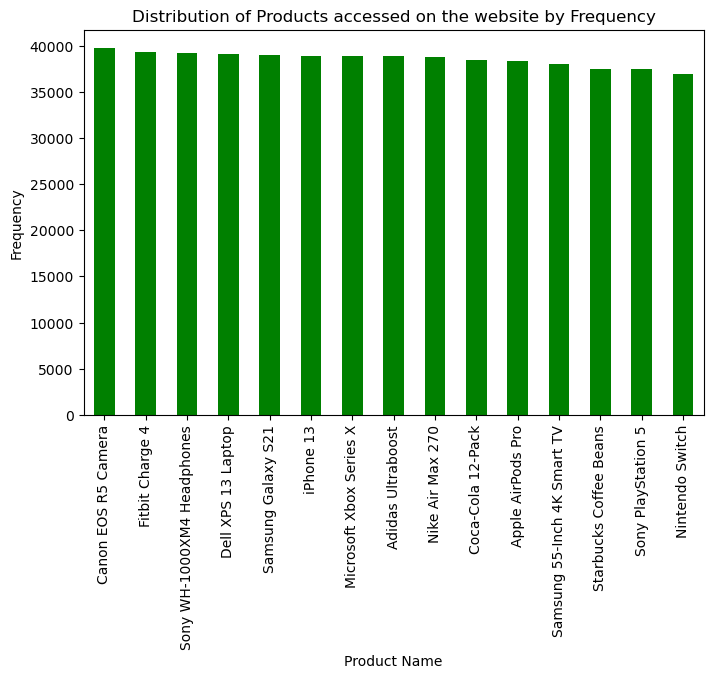

In [59]:
# Disrtibution of how products were purchased according to their frequency
product_counts = final_df1.groupby("product_name").size().sort_values(ascending = False)

plt.figure(figsize=(8, 5))
product_counts.plot(kind='bar', color='green')
plt.title('Distribution of Products accessed on the website by Frequency')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.show()

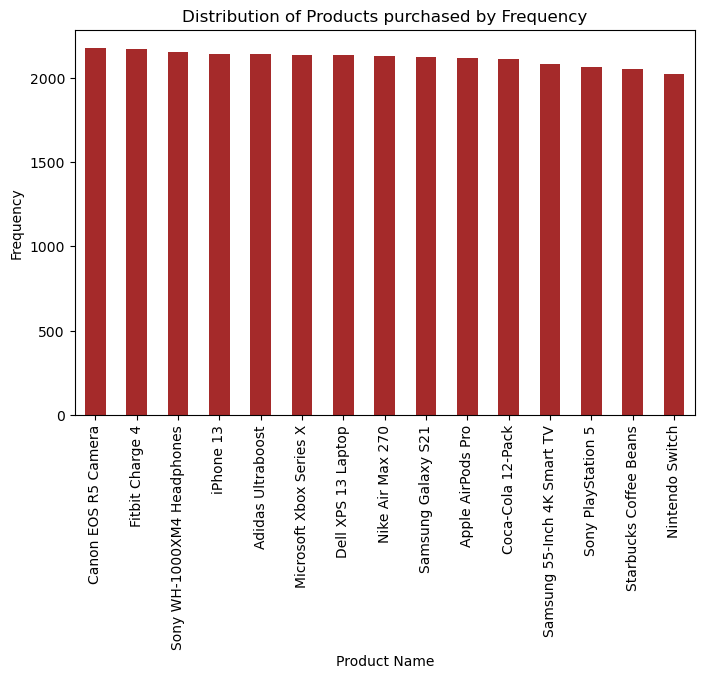

In [60]:
# Distribution of products according to how they were checked out (purchase made)
product_purchased = final_df1[final_df1['event_type'] == 'checkout']['product_name'].value_counts()

plt.figure(figsize=(8, 5))
product_purchased.plot(kind='bar', color='brown')
plt.title('Distribution of Products purchased by Frequency')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.show()

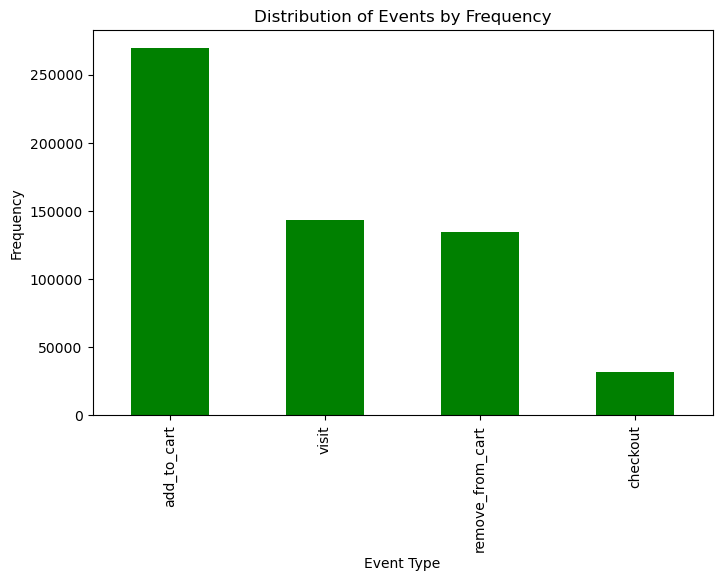

In [61]:
# Understanding activities that took place on the website based on "event type"
event_counts = final_df1.groupby("event_type").size().sort_values(ascending = False)

plt.figure(figsize=(8, 5))
event_counts.plot(kind='bar', color='green')
plt.title('Distribution of Events by Frequency')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.show()

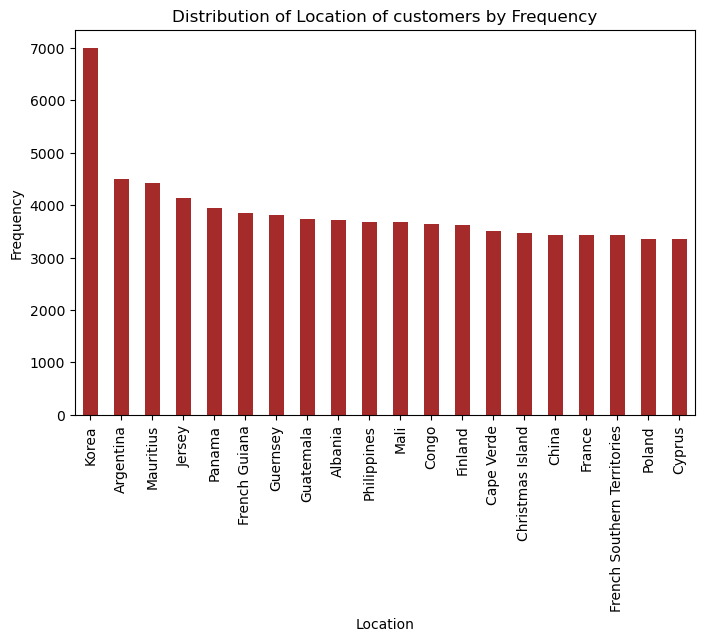

In [62]:
# Activities on the website based on location
location_counts = final_df1.groupby("location").size().sort_values(ascending = False)

plt.figure(figsize=(8, 5))
location_counts.head(20).plot(kind='bar', color='brown')
plt.title('Distribution of Location of customers by Frequency')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

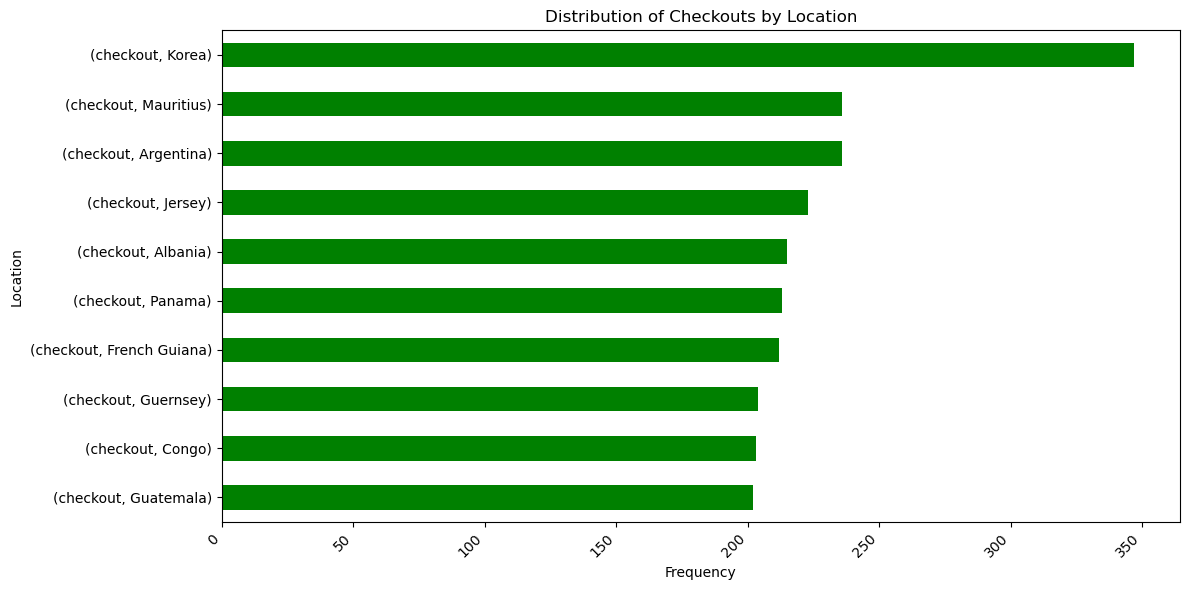

In [63]:
# Purchasing behavior based on location
checkout_by_location = event_type_by_location(final_df1, "checkout").head(10).sort_values(ascending =True)

plt.figure(figsize=(12, 6))
checkout_by_location.plot(kind='barh', color = 'green')
plt.title('Distribution of Checkouts by Location')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

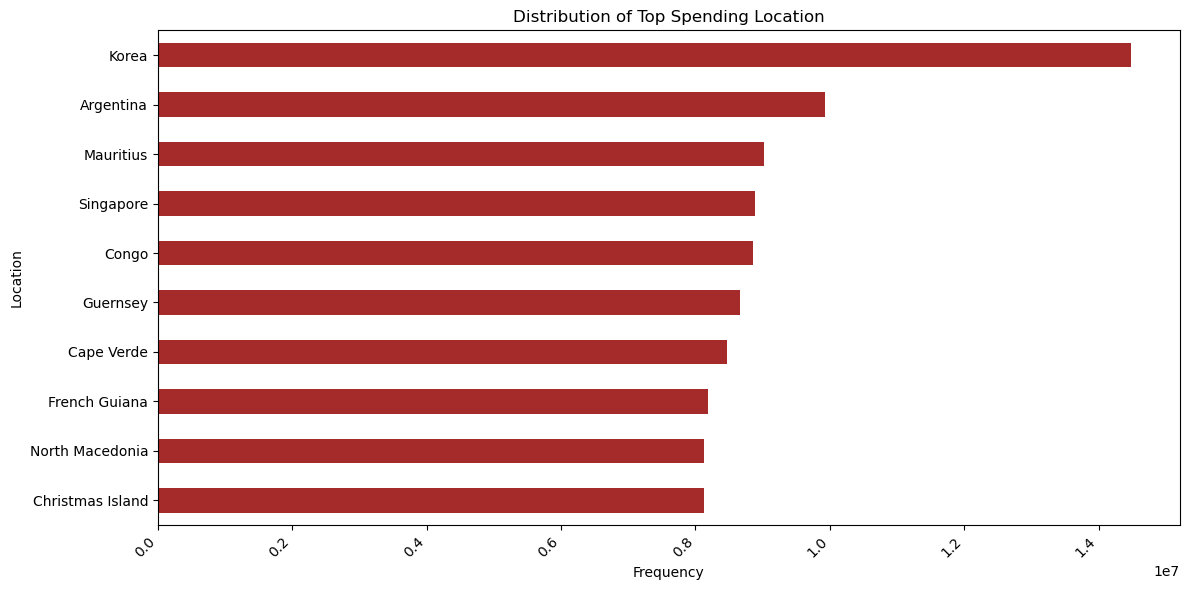

In [64]:
# Group by total spending customers by location
customer_stats_by_location = final_df1.groupby(['customer_id', 'location'])['total_spending'].sum()
top_spending_locations_counts = customer_stats_by_location.groupby('location').sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_spending_locations_counts.head(10).sort_values(ascending = True).plot(kind='barh', color = 'brown')
plt.title('Distribution of Top Spending Location')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

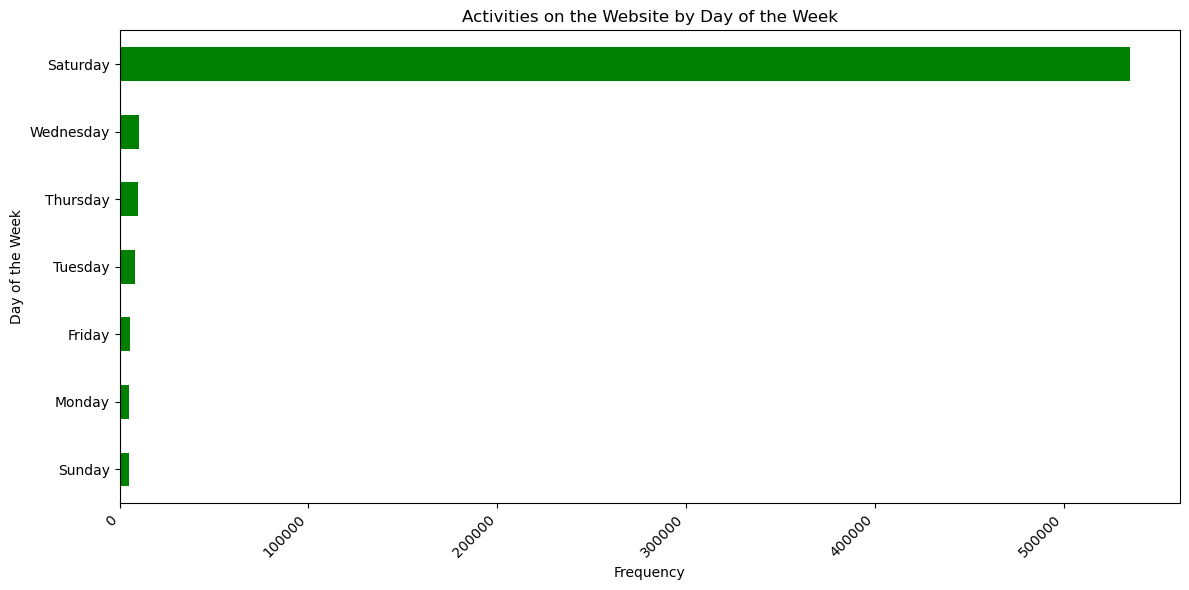

In [65]:
# Activities on the website based on day of the week
day_of_the_week_counts = final_df1.groupby("Day")["event_type"].size().sort_values(ascending = True)

plt.figure(figsize=(12, 6))
day_of_the_week_counts.plot(kind='barh', color = 'green')
plt.title('Activities on the Website by Day of the Week')
plt.xlabel('Frequency')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

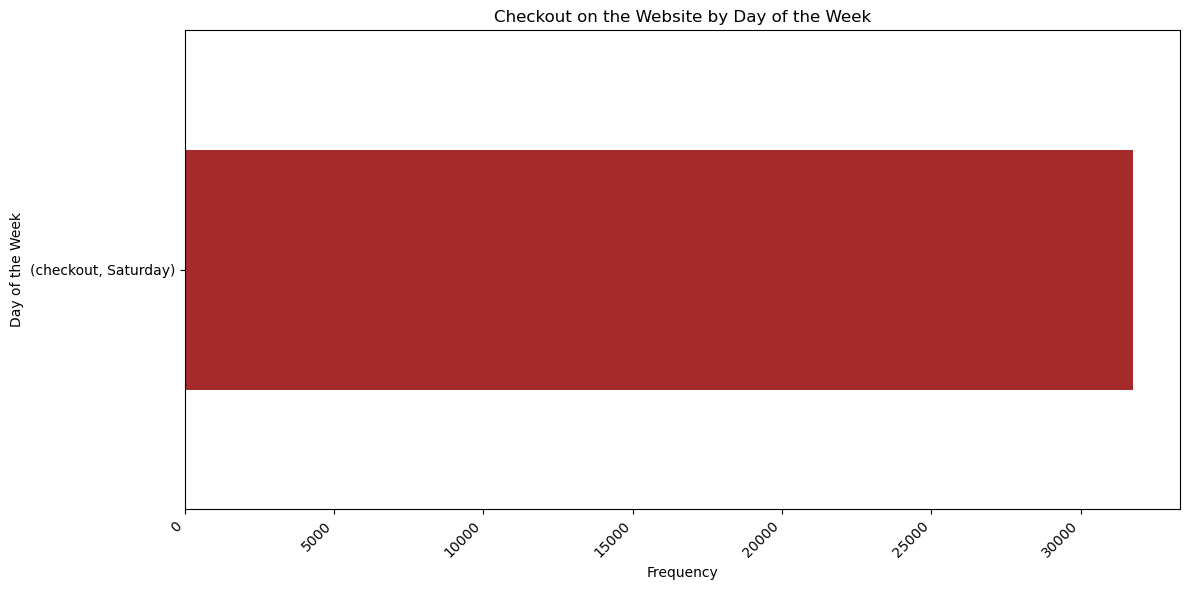

In [66]:
# Event type (checkout) distribution according to day of the week,function can be adjusted based on the event you want to view
day_of_the_week_checkout = event_type_by_day(final_df1, "checkout")

plt.figure(figsize=(12, 6))
day_of_the_week_checkout.plot(kind='barh', color = 'brown')
plt.title('Checkout on the Website by Day of the Week')
plt.xlabel('Frequency')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

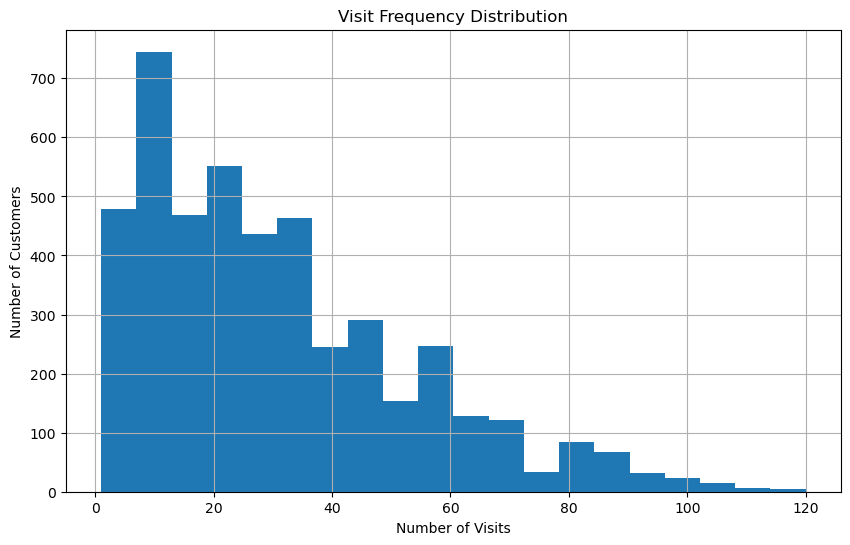

In [67]:
# Histogram of visit frequency to identify how customers interacted with the website
visit_frequency.hist(bins=20, figsize=(10, 6))
plt.title('Visit Frequency Distribution')
plt.xlabel('Number of Visits')
plt.ylabel('Number of Customers')
plt.show()

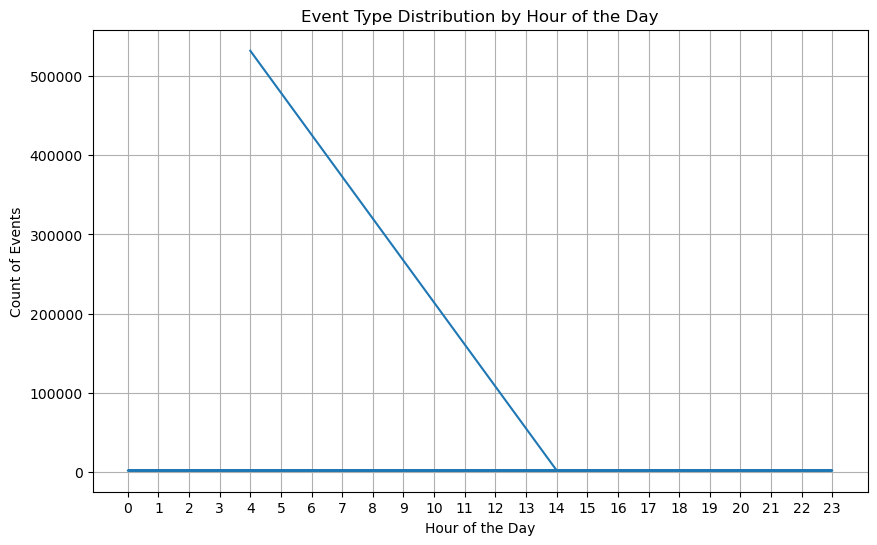

In [68]:
# Activities on the website based on hour of the day
hourly_event_counts = final_df1.groupby("Hour")["event_type"].size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
hourly_event_counts.plot(kind='line')
plt.title('Event Type Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Events')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### Conclusions and Recommendations

#### Conclusions
Based on the Exploratory Data Analysis and Visualizations done with regards to geographical location, popular products, conversion rate, customer behaviour, e.t.c., It could be observed that:

1. The highest number of website visitors originates from Korea, Mauritius, and Argentina.
2. Despite a significant number of visitors, the conversion rate remains low at 0.79%, indicating that only a small fraction of visitors make purchases.
3. The top-selling items include the Canon EOS R5 Camera, Fitbit Charge 4, and Sony WH-1000XM4 Headphones, indicating high customer interest and demand.
4. Saturday stands out as the busiest day for the website, witnessing the highest traffic and sales volume.
5. Returning customers exhibit a higher purchasing frequency compared to first-time or one-time customers, suggesting a loyal customer base with repeat purchases.

#### Recommendations
With regards to the insights gathered from the EDA, here are some recommendations to optimize the website and increase conversion rates:

1. Tailor marketing campaigns to target audiences in Korea, Mauritius, and Argentina, leveraging localized language, cultural nuances, and preferences to enhance engagement and conversion rates.
2. Implement Conversion Rate Optimization strategies such as optimizing product pages, simplifying checkout processes, and providing incentives for completing purchases to improve the conversion rate from website visitors to customers.
3. Capitalize on the popularity of top-selling products like the Canon EOS R5 Camera, Fitbit Charge 4, and Sony WH-1000XM4 Headphones by prominently featuring them on the website, offering promotions, and creating targeted marketing campaigns to drive sales.
4. Maximize sales opportunities by launching special promotions and marketing campaigns on Saturdays
5. Develop and implement customer loyalty programs, personalized recommendations, and follow-up communication to nurture relationships with returning customers, encouraging repeat purchases and fostering long-term customer loyalty.
6. To boost conversions among one-time customers, streamline the first-time shopping experience with personalized incentives and simplified checkout processes. Maintain consistent website optimization efforts on all days and strategically deploy promotions throughout the week to cater to diverse customer behaviors. Expand product offerings to include high-demand items and exclusive deals.
